# Metody eksploracji danych - laboratorium 2 zadanie "Płatki śniadaniowe"

## Cel

Wyznaczenie prducenta płatków śniadaniowych na podstawie ich cech.

In [2]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych

In [3]:
data_dir = Path('data')
data_file = data_dir / 'Platki-sniadaniowe-cereals.csv'

In [34]:
df = pd.read_csv(data_file, sep=';', index_col=0)

In [35]:
df.head()

,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
nazwa,,,,,,,,,,,,,,
100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1


In [36]:
df.describe()

,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,polka_1,polka_2,polka_3
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,6.935065,14.844156,2.545455,1.012987,159.675325,2.151948,96.129870,2.207792,0.259740,0.272727,0.467532
std,19.484119,4.422840,3.898599,1.094790,1.006473,83.832295,2.383364,71.215823,0.832524,0.441367,0.448282,0.502217
min,50.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,100.000000,3.000000,12.000000,2.000000,0.000000,130.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,110.000000,7.000000,15.000000,3.000000,1.000000,180.000000,2.000000,90.000000,2.000000,0.000000,0.000000,0.000000
75%,110.000000,11.000000,17.000000,3.000000,2.000000,210.000000,3.000000,120.000000,3.000000,1.000000,1.000000,1.000000
max,160.000000,15.000000,23.000000,6.000000,5.000000,320.000000,14.000000,330.000000,3.000000,1.000000,1.000000,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producent     77 non-null     object 
 1   kalorie       77 non-null     int64  
 2   cukry         77 non-null     int64  
 3   weglowodany   77 non-null     float64
 4   proteiny      77 non-null     int64  
 5   tluszcz       77 non-null     int64  
 6   sod           77 non-null     int64  
 7   blonnik       77 non-null     float64
 8   potas         77 non-null     int64  
 9   Liczba_polek  77 non-null     int64  
 10  srodk_polka   77 non-null     object 
 11  polka_1       77 non-null     int64  
 12  polka_2       77 non-null     int64  
 13  polka_3       77 non-null     int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 9.0+ KB


In [38]:
# Replace categorical values with numerical
df['srodk_polka'] = df['srodk_polka'].replace({'T': 1, 'N': 0})

In [39]:
df['srodk_polka'].head()

nazwa
100%_Bran                    0
100%_Natural_Bran            0
All-Bran                     0
All-Bran_with_Extra_Fiber    0
Almond_Delight               0
Name: srodk_polka, dtype: int64

## Wykresy

<Axes: xlabel='nazwa'>

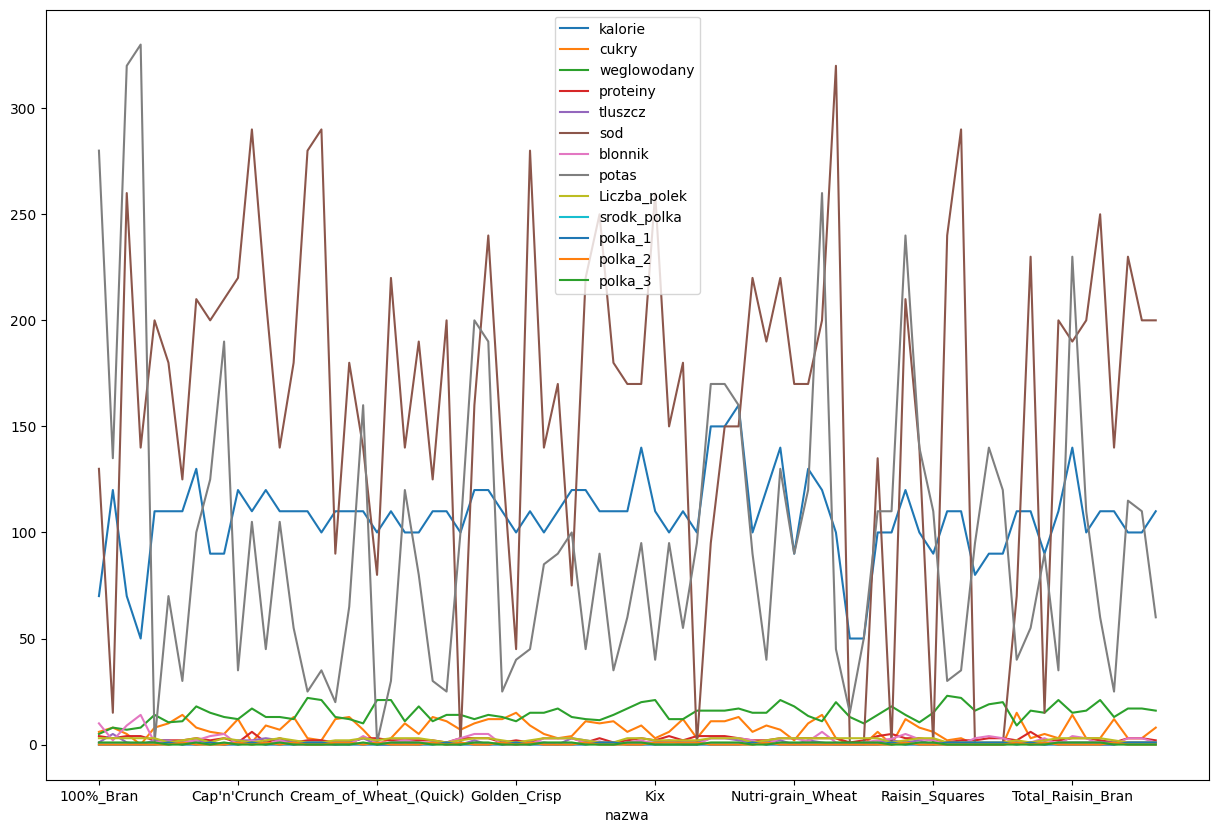

In [40]:
df.plot(figsize=(15, 10))

<Axes: xlabel='producent'>

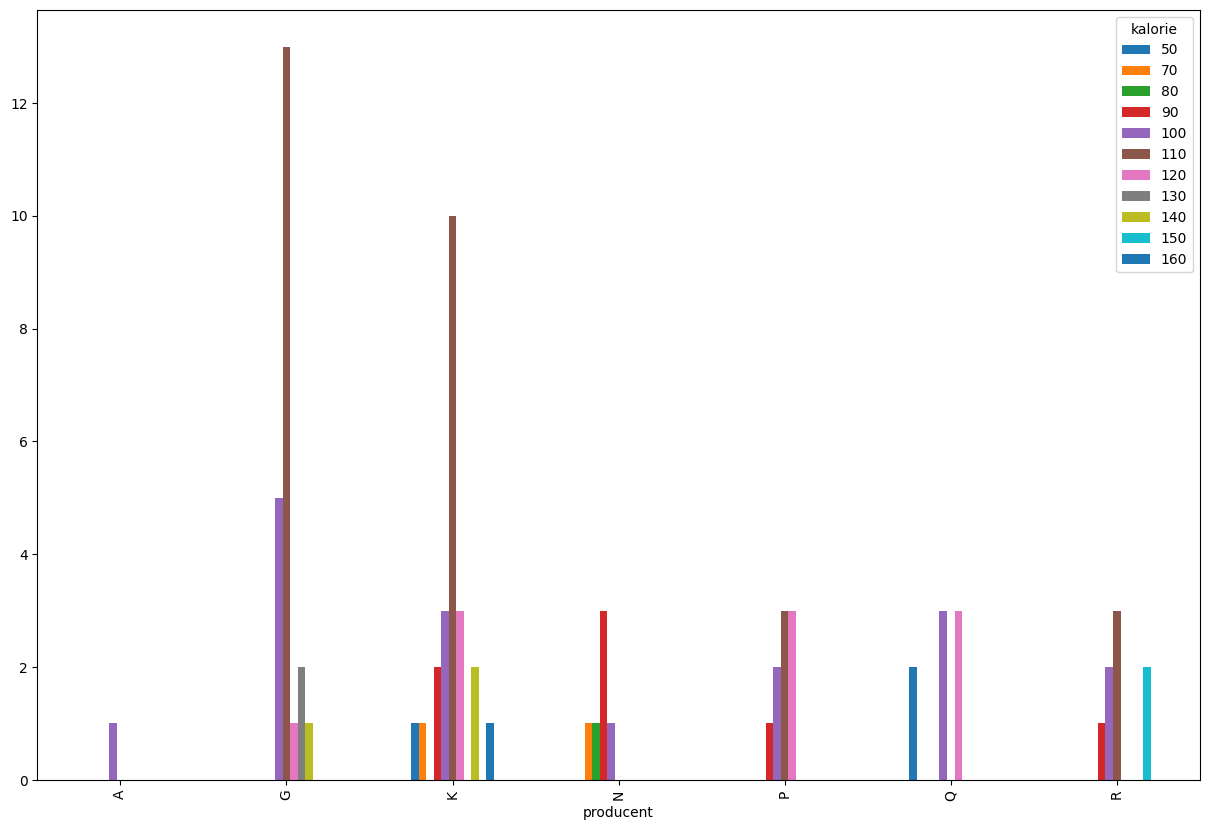

In [41]:
# Producent and calories plot
df.groupby(['producent', 'kalorie']).size().unstack().plot(kind='bar', figsize=(15, 10))

<Axes: xlabel='producent'>

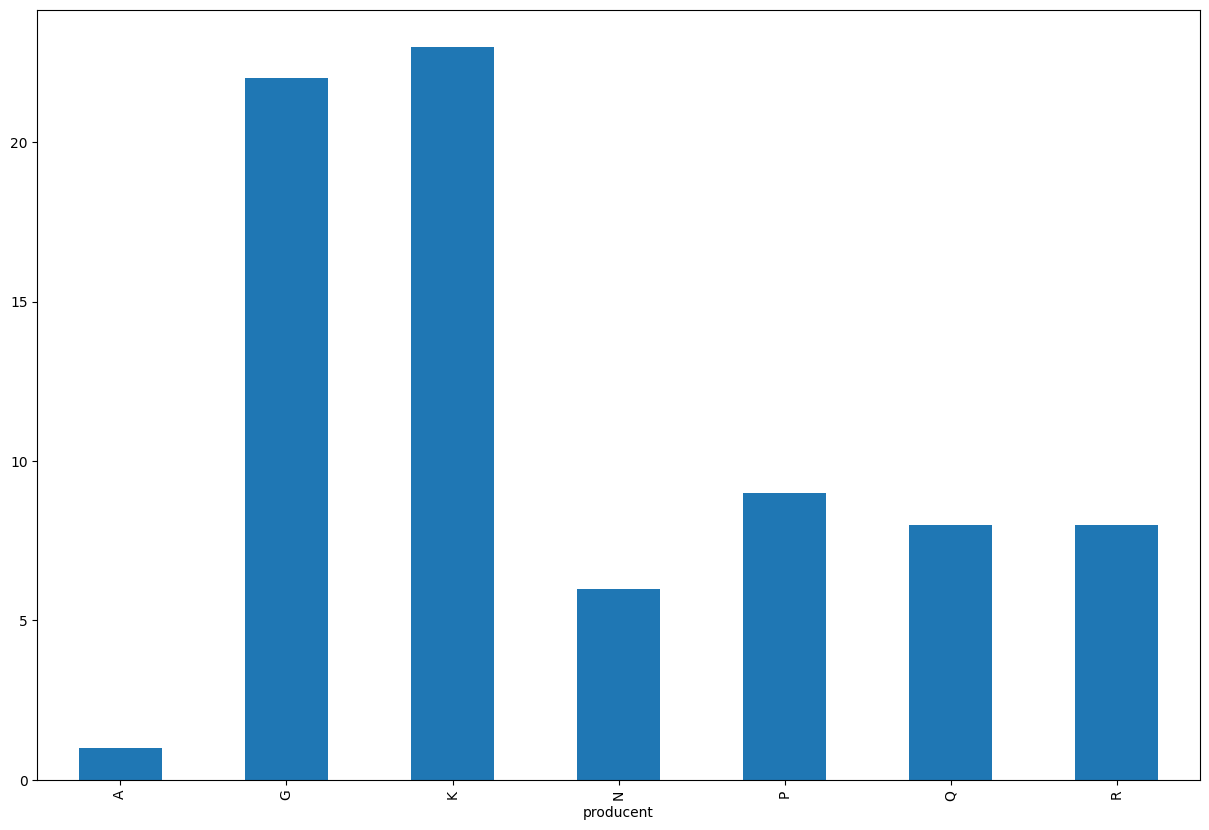

In [42]:
# Number of products per producer
df.groupby(['producent']).size().plot(kind='bar', figsize=(15, 10))

array([[<Axes: title={'center': 'kalorie'}>,
        <Axes: title={'center': 'cukry'}>,
        <Axes: title={'center': 'weglowodany'}>,
        <Axes: title={'center': 'proteiny'}>],
       [<Axes: title={'center': 'tluszcz'}>,
        <Axes: title={'center': 'sod'}>,
        <Axes: title={'center': 'blonnik'}>,
        <Axes: title={'center': 'potas'}>],
       [<Axes: title={'center': 'Liczba_polek'}>,
        <Axes: title={'center': 'srodk_polka'}>,
        <Axes: title={'center': 'polka_1'}>,
        <Axes: title={'center': 'polka_2'}>],
       [<Axes: title={'center': 'polka_3'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

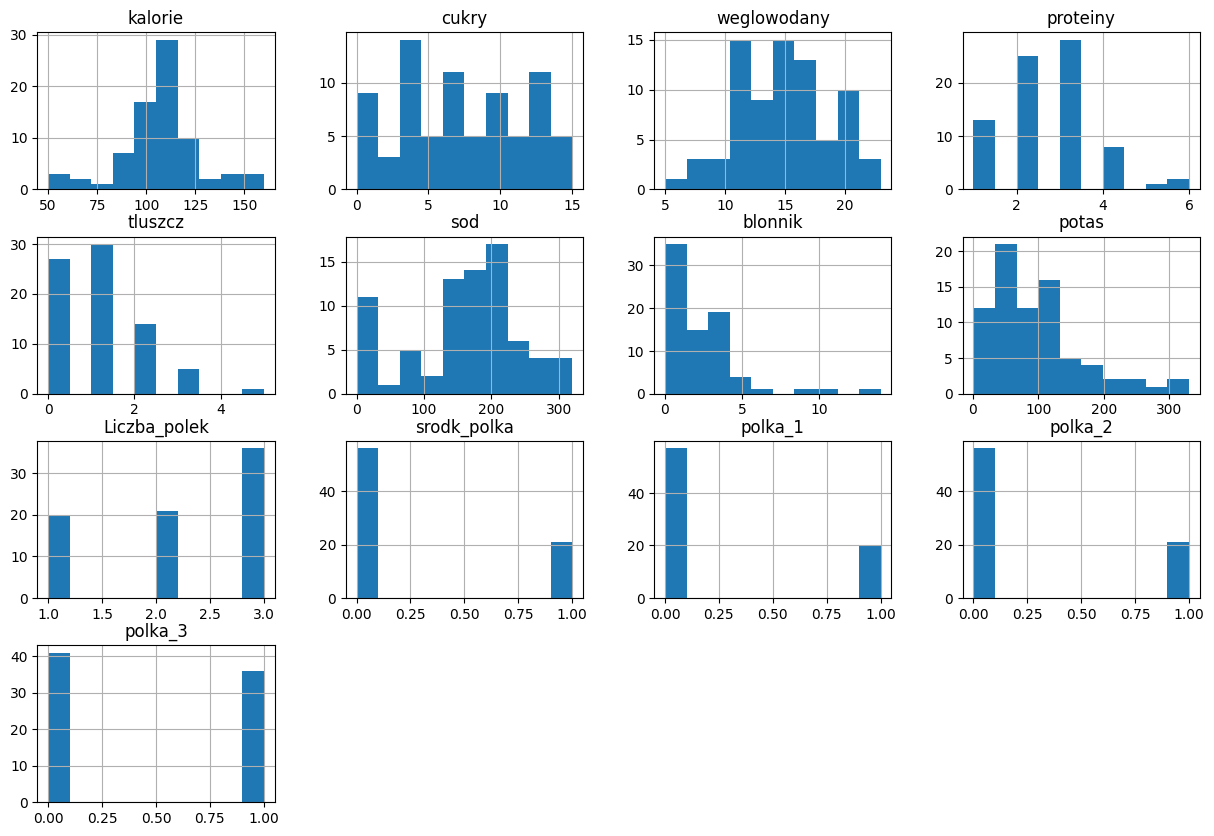

In [43]:
# Histogram
df.hist(figsize=(15, 10))

In [44]:
# Convert producent to numbers
df['producent'] = df['producent'].astype('category')
df['producent'] = df['producent'].cat.codes

In [45]:
df['producent'].head()

nazwa
100%_Bran                    3
100%_Natural_Bran            5
All-Bran                     2
All-Bran_with_Extra_Fiber    2
Almond_Delight               6
Name: producent, dtype: int8

<Axes: >

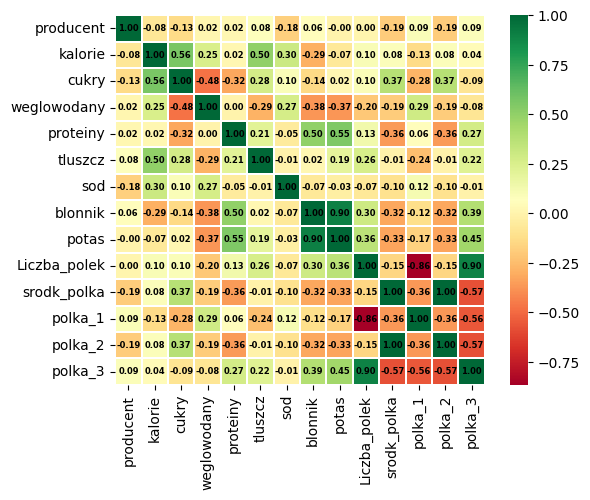

In [56]:
# Correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.1,
            square=True,
            fmt='.2f',
            annot_kws={'size': 6, 'color': 'black', 'weight': 'bold'})

## Klasyfikacja

In [57]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

### Trenowanie regresji logistycznej

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
X_train = df_train.drop('producent', axis=1)
y_train = df_train['producent']
X_test = df_test.drop('producent', axis=1)
y_test = df_test['producent']

In [60]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Testowanie regresji logistycznej

In [61]:
y_pred = logistic_regression.predict(X_test)

In [62]:
print('y_pred: ', y_pred)
print('y_test: ', y_test.values)

y_pred:  [2 1 2 2 2 1 2 5 4 1 2 3 3 1 2]
y_test:  [4 1 2 2 2 1 2 6 2 1 2 3 3 2 1]


In [63]:
accuracy = np.mean(y_pred == y_test.values)

In [67]:
print(f'accuracy: {accuracy:.2f}' )

accuracy: 0.67


In [68]:
print(f'score: {logistic_regression.score(X_test, y_test):.2f}')

score: 0.67


In [76]:
from sklearn.metrics import confusion_matrix

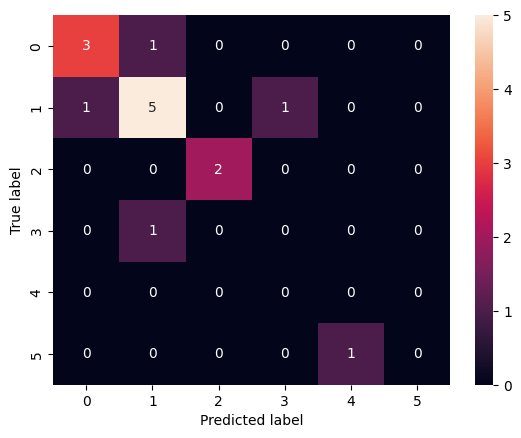

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Standaryzacja danych

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [84]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

## Sprawdzenie modelu po standaryzacji

In [86]:
y_pred = logistic_regression.predict(X_test_scaled)

In [87]:
print('y_pred: ', y_pred)
print('y_test: ', y_test.values)

y_pred:  [2 1 2 2 2 1 2 1 4 1 2 3 3 2 1]
y_test:  [4 1 2 2 2 1 2 6 2 1 2 3 3 2 1]


In [88]:
accuracy = np.mean(y_pred == y_test.values)

In [89]:
print(f'accuracy: {accuracy:.2f}' )

accuracy: 0.80


In [91]:
from sklearn.metrics import confusion_matrix

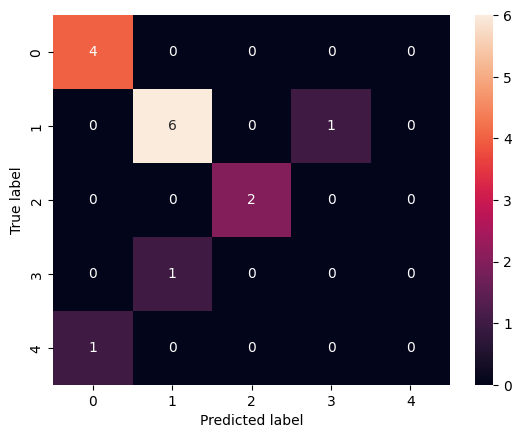

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Współczynniki regresji logistycznej

In [94]:
print(f'Equasion of the logistic regression: {logistic_regression.intercept_} + {logistic_regression.coef_} * x')

Equasion of the logistic regression: [-2.59739041  1.44128724  1.44486006 -1.02559388  0.61958861 -0.01707136
  0.13431975] + [[-0.05543257 -0.30629585  0.08360367  0.61479224  0.07391655 -0.64774241
  -0.45990958  0.20790055  0.02412207  0.44907773 -0.25256663  0.44907773
  -0.17667953]
 [-0.07942608  0.38278791  0.03393932  0.0673424   0.36812722  0.86830646
  -1.33315388  0.77896431  0.05360572 -0.13160293  0.01579995 -0.13160293
   0.10163808]
 [ 0.22044775  0.37834366  0.26347512  0.03337892 -0.96203948  0.36105707
   0.89202034 -0.27974387  0.09822781  0.01397495 -0.1013853   0.01397495
   0.07460758]
 [-0.3285432  -0.56993399 -0.01168952 -0.09606466 -0.46199318 -0.52692537
   0.69628508  0.05188953 -0.17070599  0.31702494  0.00182591  0.31702494
  -0.27900491]
 [ 0.83216722  0.39469768 -0.37888135 -0.36456837 -0.45268088 -0.39571516
   0.54270647 -0.22858143  0.08629508 -0.33274942  0.08719639 -0.33274942
   0.21651746]
 [-0.81625609 -0.41314496 -0.5945493   0.17781509  1.071448